In [1]:
# Pipeline for different experiments
list_of_size_normalizations = ["padding", "average", "smallest"]
list_of_train_splits = [0.8, 0.9]
list_of_batch_sizes = [100]
list_of_freeze_layers = [True, False]

In [2]:
from utils import load_checkpoint

base_path = "D:\\PythonProjects\\HWR_group_5\\data\\style_classification\\models"
dict_of_results_checkpoints = dict()
for normalization_type in list_of_size_normalizations:
    for train_split in list_of_train_splits:
        for batch_size in list_of_batch_sizes:
            for freeze_bool in list_of_freeze_layers:

                # Path to load model and everything realated to it
                model_folder = "norm_{}_split_{}_batch_{}_freeze_{}".format(
                    normalization_type, train_split, batch_size, freeze_bool
                    )

                path_of_model = os.path.join(base_path, model_folder)

                curr_best_checkpoint = 0
                for check_file in os.listdir(path_of_model):
                    if check_file.endswith('.pth'):
                        curr_checkppoint = int(check_file.split("_")[1].split(".")[0])
                        if curr_checkppoint > curr_best_checkpoint:
                            curr_best_checkpoint = curr_checkppoint
                

                checkpoint = load_checkpoint(path_of_model, curr_best_checkpoint)
                curr_results = checkpoint['results']
                dict_of_results_checkpoints[model_folder] = curr_results
                

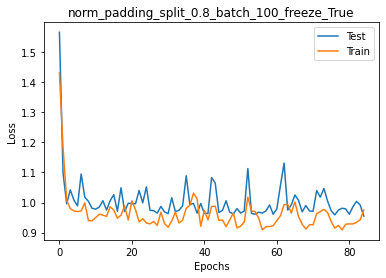

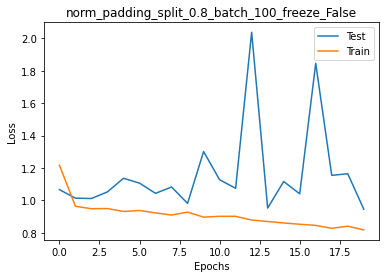

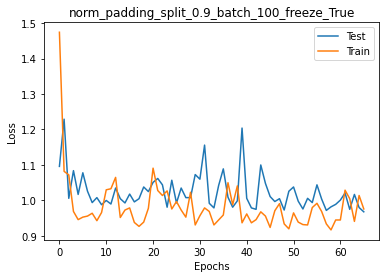

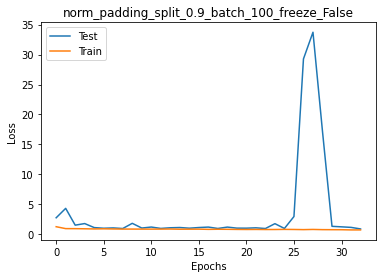

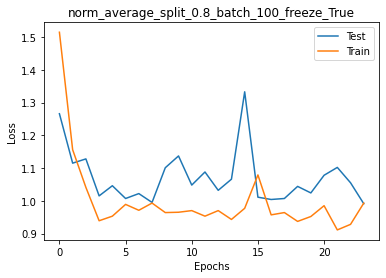

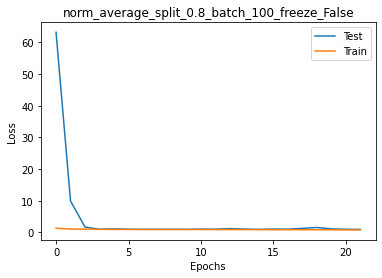

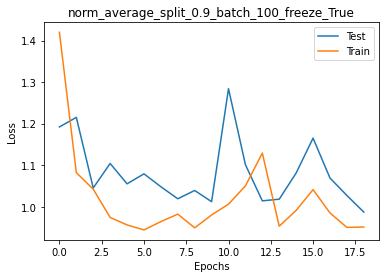

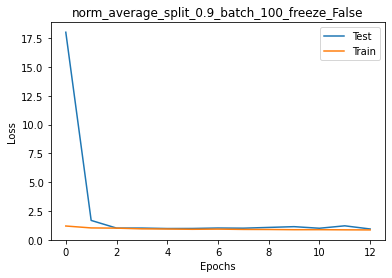

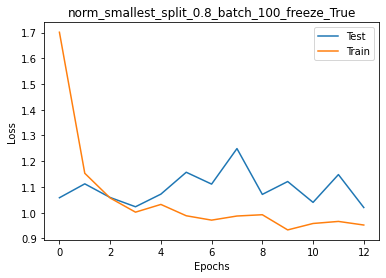

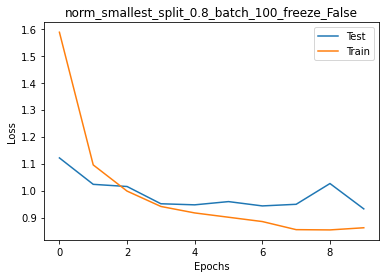

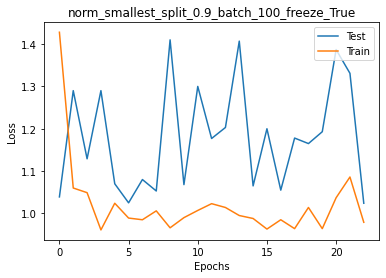

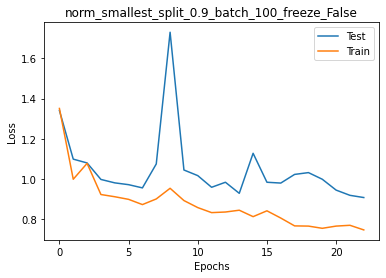

In [9]:
import matplotlib.pyplot as plt

for k, v in dict_of_results_checkpoints.items():
    epochs = range(len(v['test_acc']))
    plt.plot(epochs, v['test_loss'], label='Test')
    plt.plot(epochs, v['train_loss'], label='Train')
    plt.legend()
    plt.title(k)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
#plt.cla()

In [19]:
dict_of_results['test_acc'][84]

52.716

In [21]:
dict_of_results['test_loss'][84]

0.955

In [14]:
min(dict_of_results['test_loss'])

0.955